In [49]:
import pickle
import numpy as np
from collections import defaultdict
import statistics
import matplotlib.pyplot as plt

## Analyzing the search over the space of publishing policies

In this analysis...
- num_bins = 3
- num_draws = 10
- num_participants = 10
- num_generations = 15

In [116]:
file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/publishing_policies_3_bins.p", 'rb')
outputs = pickle.load(file)

### Graphic to show relationship between supporting data and given metrics

In [100]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[0]].append(outputs[i][0])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y1 = []
for key in median_values:
    y1.append(key[1])

In [101]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[0]].append(outputs[i][1])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y2 = []
for key in median_values:
    y2.append(key[1])

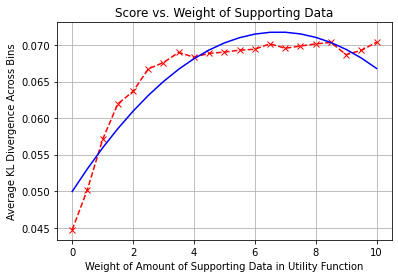

In [106]:
x = np.linspace(0, 10, 21)

# plt.plot(x, y1, label='Arm Score', marker='o', linestyle='-', color='blue')
plt.plot(x, y2, marker='x', linestyle='--', color='red')

plt.xlabel('Weight of Amount of Supporting Data in Utility Function')
plt.ylabel('Average KL Divergence Across Bins')
plt.title('Score vs. Weight of Supporting Data')

degree = 2
coefficients = np.polyfit(x, y2, degree)
poly_curve = np.polyval(coefficients, x)
plt.plot(x, poly_curve, color='blue', label=f'Best-fit Curve (Degree {degree})')


# plt.legend()

plt.grid(True)
plt.savefig('graphics/publishing_search_3_bins_supporting_data.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Graphic to show relationship between surprise level and given metrics

In [107]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[1]].append(outputs[i][0])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y1 = []
for key in median_values:
    y1.append(key[1])

In [108]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[1]].append(outputs[i][1])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y2 = []
for key in median_values:
    y2.append(key[1])

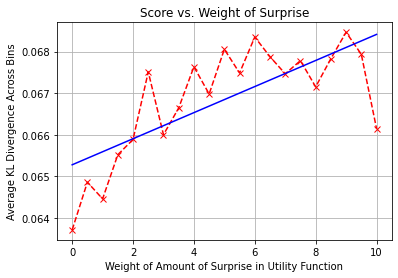

In [111]:
x = np.linspace(0, 10, 21)

# plt.plot(x, y1, label='Arm Score', marker='o', linestyle='-', color='blue')
plt.plot(x, y2, marker='x', linestyle='--', color='red')

plt.xlabel('Weight of Amount of Surprise in Utility Function')
plt.ylabel('Average KL Divergence Across Bins')
plt.title('Score vs. Weight of Surprise')

# plt.legend()
degree = 1
coefficients = np.polyfit(x, y2, degree)
poly_curve = np.polyval(coefficients, x)
plt.plot(x, poly_curve, color='blue', label=f'Best-fit Curve (Degree {degree})')

plt.grid(True)
plt.savefig('graphics/publishing_search_3_bins_surprise.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Graphic to show relationship between publication bias and given metrics

In [117]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[2]].append(outputs[i][0])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y1 = []
for key in median_values:
    y1.append(key[1])

In [118]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[2]].append(outputs[i][1])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y2 = []
for key in median_values:
    y2.append(key[1])

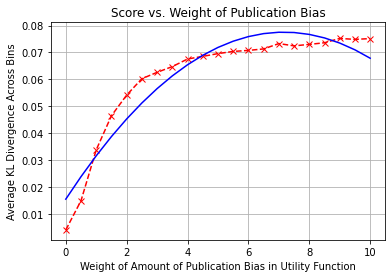

In [119]:
x = np.linspace(0, 10, 21)

# plt.plot(x, y1, label='Arm Score', marker='o', linestyle='-', color='blue')
plt.plot(x, y2, label='Entropy Score', marker='x', linestyle='--', color='red')

plt.xlabel('Weight of Amount of Publication Bias in Utility Function')
plt.ylabel('Average KL Divergence Across Bins')
plt.title('Score vs. Weight of Publication Bias')

degree = 2
coefficients = np.polyfit(x, y2, degree)
poly_curve = np.polyval(coefficients, x)
plt.plot(x, poly_curve, color='blue', label=f'Best-fit Curve (Degree {degree})')

plt.grid(True)
plt.savefig('graphics/publishing_search_3_bins_publication_bias.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Score across generations and bin probabilities

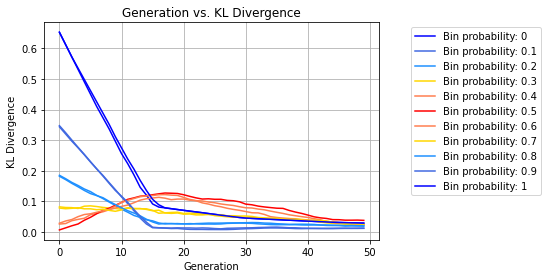

In [70]:
file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/final_map_new.p", 'rb')
final_map = pickle.load(file)
x = []

for gen_no in final_map[0]:
    x.append(gen_no)
    
red_to_corange_gradient = [
    '#FF0000',    # Red
    '#FF7F50',    # Coral
    '#FFD700',    # Gold
]

shades_of_blue = [
    '#0000FF',  # Blue
    '#4169E1',  # Royal Blue
    '#1E90FF',  # Dodger Blue
    '#6495ED'   # Cornflower Blue
]


count = 0
for key in final_map:
    y = []
    for gen_no in final_map[key]:
        y.append(final_map[key][gen_no])
        
    if abs(count - 5) < 3:
        color = red_to_corange_gradient[abs(count - 5)]
    else:
        color = shades_of_blue[5 - abs(count - 5)]

#     plt.plot(x, y, label=f"Bin probability: {key}", color=rainbow_colors[abs(count - 5)])
    plt.plot(x, y, label=f"Bin probability: {key}", color=color)
    count += 1

plt.xlabel('Generation')
plt.ylabel('KL Divergence')
plt.title('Generation vs. KL Divergence')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))

plt.grid(True)

plt.savefig('graphics/KL_generations_bin_probs_new.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Which parameters give us the publication crisis?

In [155]:
# aim is to graph scalar for surprise against false publication rate (also graph y = 0.3)
# plot a line corresponding to different scalar values for the amount of data...
# ... this will tell you how well an increase in data is able to curtail false publication values
surprise_values = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/fpr.p", 'rb')
fpr = pickle.load(file)

In [156]:
rainbow_colors = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#4B0082', '#8B00FF', '#FF00FF', '#FF1493', '#FF4500', '#FFD700']

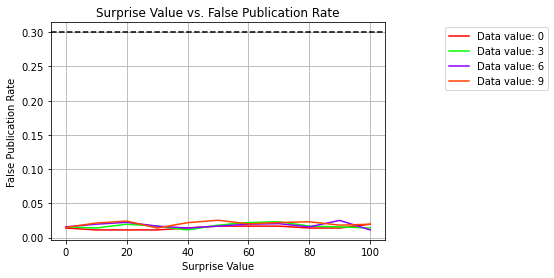

In [157]:
x = surprise_values
y = {}
for i in data_values:
    y[i] = np.zeros(len(surprise_values))


for key in fpr:
    surprise_val = key[0]
    data_val = key[1]
    
    surprise_idx = 0
    for i in range(0, len(surprise_values)):
        if surprise_val == surprise_values[i]:
            surprise_idx = i
    
    y[data_val][surprise_idx] = fpr[key]

for data_val in y:
    if data_val / 3 == round(data_val / 3):
        plt.plot(x, y[data_val], label=f"Data value: {data_val}", color=rainbow_colors[data_val])

plt.axhline(y=0.3, color='black', linestyle='--')
    
plt.xlabel('Surprise Value')
plt.ylabel('False Publication Rate')
plt.title('Surprise Value vs. False Publication Rate')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))

plt.grid(True)

plt.savefig('graphics/surprise_vs_false_publication_rate.pdf', format='pdf', bbox_inches='tight')
plt.show()